In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

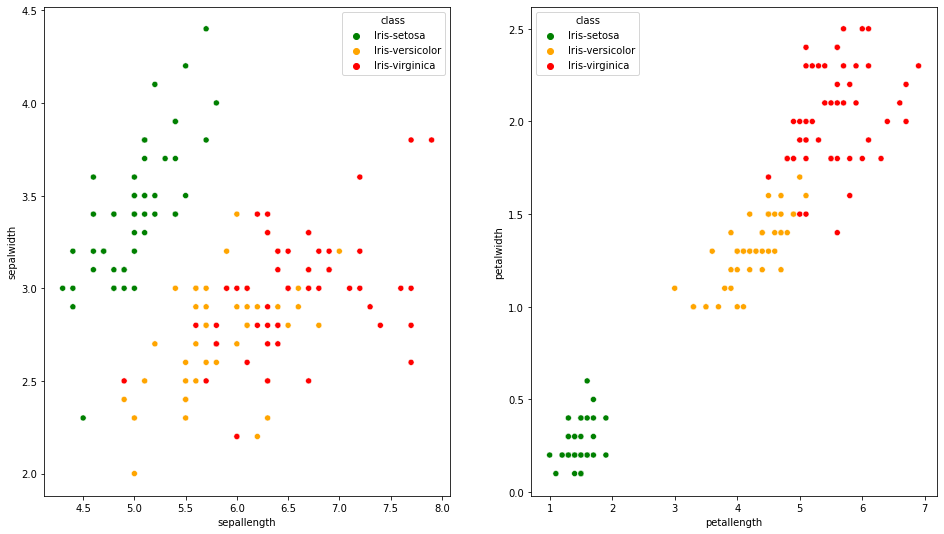

In [3]:
plt.figure(figsize=(16,9))
plt.subplot(121)
sns.scatterplot(data = df,x = 'sepallength',y = 'sepalwidth',hue = 'class',palette={'Iris-setosa':'green','Iris-virginica':'red','Iris-versicolor':'orange'})
plt.subplot(122)
sns.scatterplot(data = df,x = 'petallength',y = 'petalwidth',hue = 'class',palette={'Iris-setosa':'green','Iris-virginica':'red','Iris-versicolor':'orange'})

In [4]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='class', ylabel='petalwidth'>

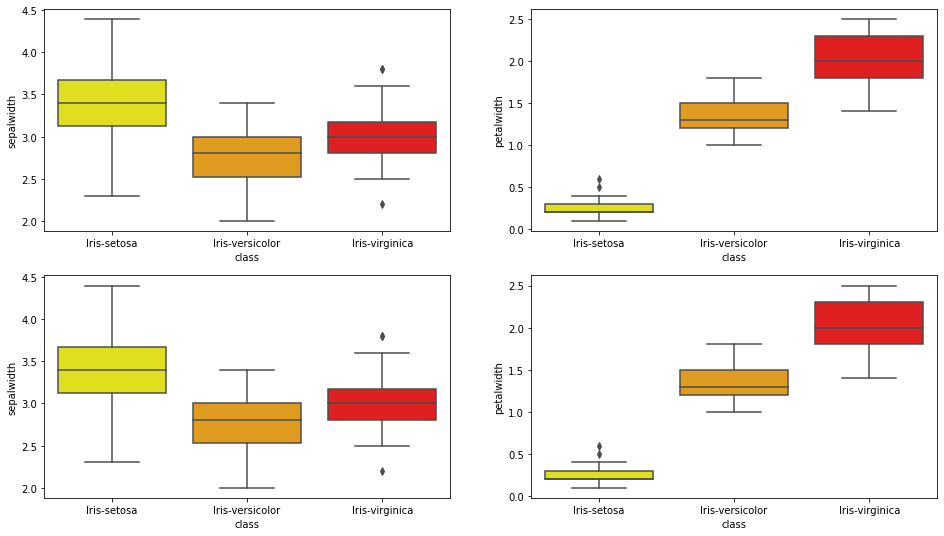

In [5]:
plt.figure(figsize=(16,9))
plt.subplot(221)
sns.boxplot(data = df,y = 'sepalwidth',x = 'class',palette={'Iris-setosa':'yellow','Iris-virginica':'red','Iris-versicolor':'orange'})
plt.subplot(222)
sns.boxplot(data = df,y = 'petalwidth',x = 'class',palette={'Iris-setosa':'yellow','Iris-virginica':'red','Iris-versicolor':'orange'})
plt.subplot(223)
sns.boxplot(data = df,y = 'sepalwidth',x = 'class',palette={'Iris-setosa':'yellow','Iris-virginica':'red','Iris-versicolor':'orange'})
plt.subplot(224)
sns.boxplot(data = df,y = 'petalwidth',x = 'class',palette={'Iris-setosa':'yellow','Iris-virginica':'red','Iris-versicolor':'orange'})

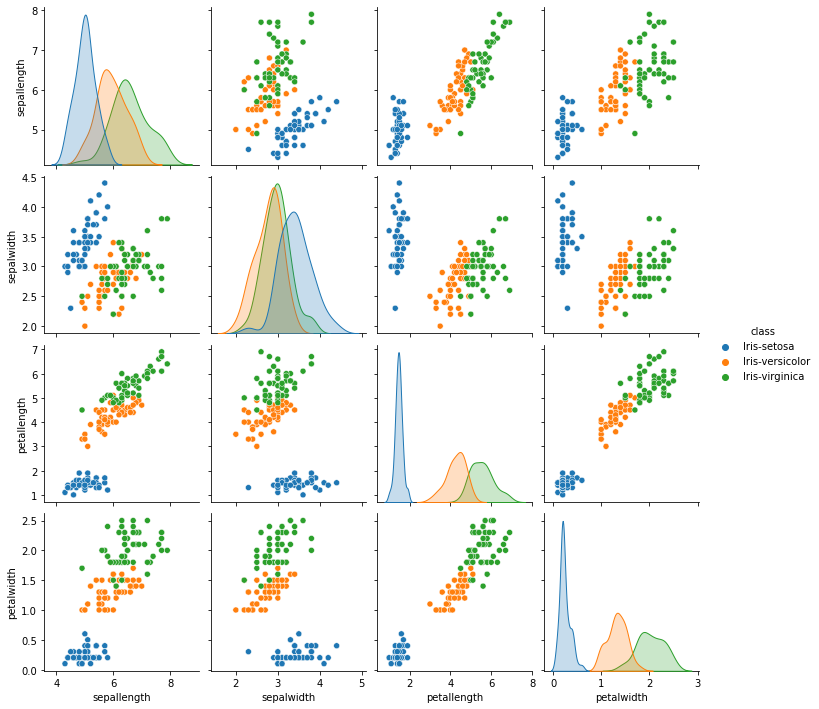

In [6]:
sns.pairplot(data = df,hue = 'class')

<AxesSubplot:>

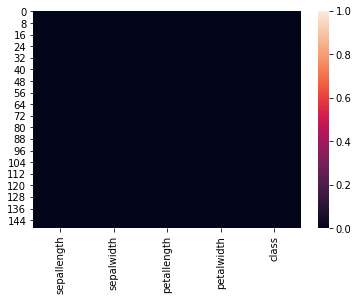

In [6]:
sns.heatmap(data = df.isnull(),vmax = 1,vmin=0)

In [15]:
def makebinary(p):
    if p=='Iris-setosa':
        return 0
    elif p=='Iris-virginica':
        return 1
    else:
        return 2

In [16]:
df['class'] = df['class'].apply(makebinary)

In [17]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [18]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy')
print(accuracy_score(y_test,y_pred)*100)
print('classification report')
print(classification_report(y_test,y_pred))

confusion matrix
[[13  0  0]
 [ 0 12  0]
 [ 0  1 19]]
Accuracy
97.77777777777777
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Support vector machine

In [22]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy')
print(accuracy_score(y_test,y_pred)*100)
print('classification report')
print(classification_report(y_test,y_pred))

confusion matrix
[[13  0  0]
 [ 0 12  0]
 [ 0  1 19]]
Accuracy
97.77777777777777
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# K nearest neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy')
print(accuracy_score(y_test,y_pred)*100)
print('classification report')
print(classification_report(y_test,y_pred))

confusion matrix
[[13  0  0]
 [ 0 12  0]
 [ 0  0 20]]
Accuracy
100.0
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        20

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# DECISION TREE AND RANDOM FOREST ALGORITHM

In [24]:
from sklearn.tree import DecisionTreeClassifier
dg = DecisionTreeClassifier()
dg.fit(X_train,y_train)
y_pred = dg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy')
print(accuracy_score(y_test,y_pred)*100)
print('classification report')
print(classification_report(y_test,y_pred))

confusion matrix
[[13  0  0]
 [ 0 11  1]
 [ 0  1 19]]
Accuracy
95.55555555555556
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [27]:
comatrix = df.corr()['class'][:]
comatrix_names = df.corr().columns

<AxesSubplot:xlabel='class'>

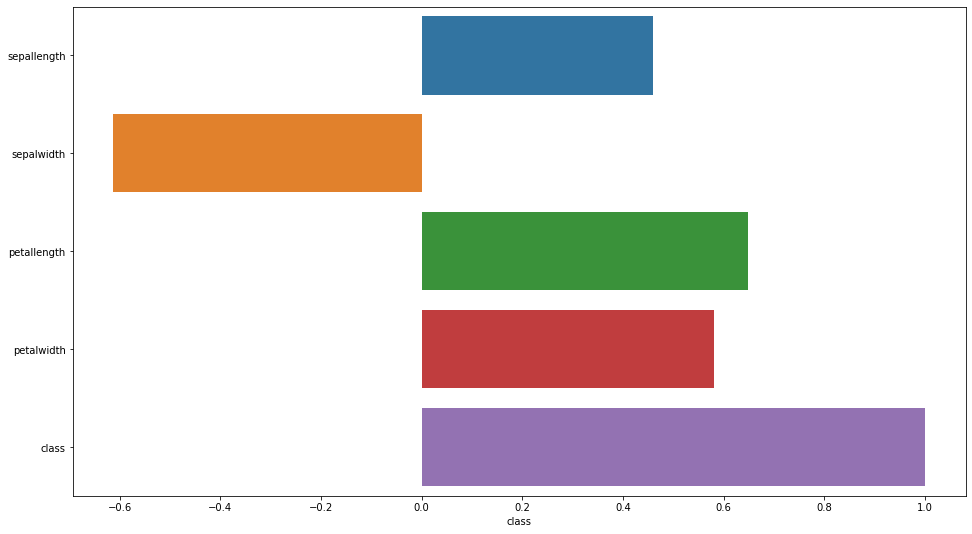

In [28]:
plt.figure(figsize=(16,9))
sns.barplot(x = comatrix,y = comatrix_names)

In [29]:
l = []
for i in range(len(comatrix)):
    if comatrix[i]<=0:
        l.append(comatrix_names[i])
l

['sepalwidth']

In [31]:
X_new = df.drop(l,axis = 1)
y_new = df['class']
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new, y_new, test_size=0.33, random_state=101)


In [32]:
from sklearn.tree import DecisionTreeClassifier
dg = DecisionTreeClassifier()
dg.fit(X_train_new,y_train_new)
y_pred_new = dg.predict(X_test_new)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('confusion matrix')
print(confusion_matrix(y_test_new,y_pred_new))
print('Accuracy')
print(accuracy_score(y_test_new,y_pred_new)*100)
print('classification report')
print(classification_report(y_test_new,y_pred_new))

confusion matrix
[[15  0  0]
 [ 0 13  0]
 [ 0  0 22]]
Accuracy
100.0
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

